# Project Matt Hacket - SuperFoodsMax Sales Revenue Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("dataset_2017_2020.csv")

In [3]:
df.head()

,customer_id,product_id,basket_id,loyalty,household_type,age_band,department,brand,commodity,store,transaction_date,price,days_since_first
0,15803,1131974,57266,Loyalist,1 adult with kids,19-24,Grocery,private,Baked bread/buns/rolls,374,2018-10-18 00:00:00,0.99,0
1,15803,1051516,57266,Loyalist,1 adult with kids,19-24,Produce,national,Vegetables - all others,374,2018-10-18 00:00:00,0.70,0
2,15803,967254,57266,Loyalist,1 adult with kids,19-24,Pharmaceutical,national,Cold and flu,374,2018-10-18 00:00:00,1.68,0
3,15803,1134222,57266,Loyalist,1 adult with kids,19-24,Grocery,private,Paper housewares,374,2018-10-18 00:00:00,2.59,0
4,15803,1003421,57266,Loyalist,1 adult with kids,19-24,Grocery,national,Soup,374,2018-10-18 00:00:00,0.60,0


In [4]:
df.shape

(77750, 13)

In [5]:
df.columns

Index(['customer_id', 'product_id', 'basket_id', 'loyalty', 'household_type',
       'age_band', 'department', 'brand', 'commodity', 'store',
       'transaction_date', 'price', 'days_since_first'],
      dtype='object')

In [6]:
df.groupby('loyalty').agg(sum_price=('price', 'sum')).sort_values(by='sum_price', ascending = False)

,sum_price
loyalty,
Promiscuous,145365.55
Loyalist,102324.80
First Time Buyer,3524.53


In [7]:
print("Min: ", df.transaction_date.min())
print("Max: ", df.transaction_date.max())

Min:  2017-01-19 00:00:00
Max:  2020-05-19 00:00:00


In [8]:
df.groupby('loyalty').agg(sum_price=('price', 'sum')).sort_values(by='sum_price', ascending = False)

,sum_price
loyalty,
Promiscuous,145365.55
Loyalist,102324.80
First Time Buyer,3524.53


Text(0, 0.5, 'Revenue')

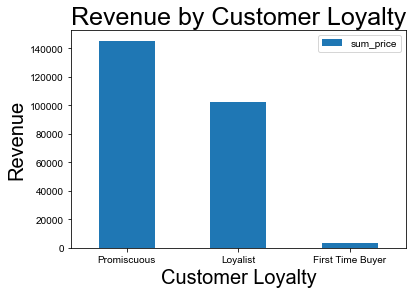

In [9]:
custrev = df.groupby('loyalty').agg(sum_price=('price', 'sum')).sort_values(by='sum_price', ascending = False).plot(kind='bar')

sns.set(rc={"figure.figsize":(10, 8)})
plt.title("Revenue by Customer Loyalty", fontsize = 25)
plt.xlabel('Customer Loyalty', fontsize = 20)
plt.xticks(rotation = 0)
plt.ylabel('Revenue', fontsize = 20)

In [10]:
df.groupby('loyalty').agg(sum_price=('price', 'sum')).sort_values(by='sum_price', ascending = False)

,sum_price
loyalty,
Promiscuous,145365.55
Loyalist,102324.80
First Time Buyer,3524.53


In [11]:
df.groupby('household_type').agg(sum_price=('price', 'sum')).sort_values(by='sum_price', ascending = False)

,sum_price
household_type,
2 adults with kids,73075.59
1 adult with kids,60847.26
2 adults with no kids,55455.15
Single male,39440.96
Single female,22395.92


<AxesSubplot:xlabel='department'>

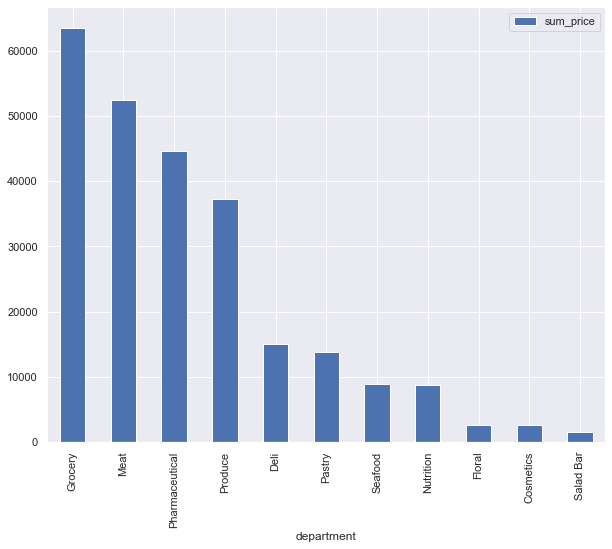

In [12]:
df.groupby('department').agg(sum_price=('price', 'sum')).sort_values(by='sum_price', ascending = False).plot(kind='bar')

Text(0.5, 0, 'Department')

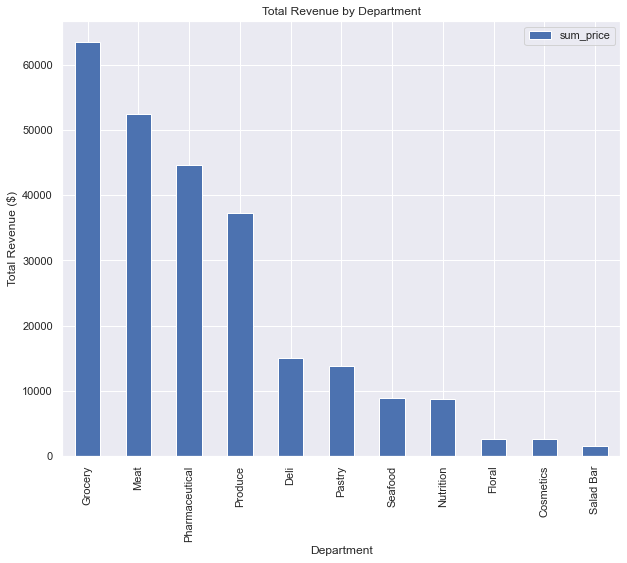

In [13]:
df.groupby('department').agg(sum_price=('price', 'sum')).sort_values(by='sum_price', ascending = False).plot(kind='bar')
plt.title("Total Revenue by Department")
plt.ylabel("Total Revenue ($)")
plt.xlabel("Department")

In [15]:
depts = df.groupby(['department', 'loyalty']).agg(sum_price=('price', 'sum')).sort_values(by=['loyalty', 'sum_price'], ascending = False)
depts

,,sum_price
department,loyalty,
Grocery,Promiscuous,36892.98
Meat,Promiscuous,30652.16
Pharmaceutical,Promiscuous,25910.60
Produce,Promiscuous,21410.91
Deli,Promiscuous,8787.97
Pastry,Promiscuous,7834.24
Nutrition,Promiscuous,5175.25
Seafood,Promiscuous,4959.81
Floral,Promiscuous,1427.96


In [19]:
depts.reset_index(inplace=True)

# USED IN PRESENTATION

<Figure size 1440x576 with 0 Axes>

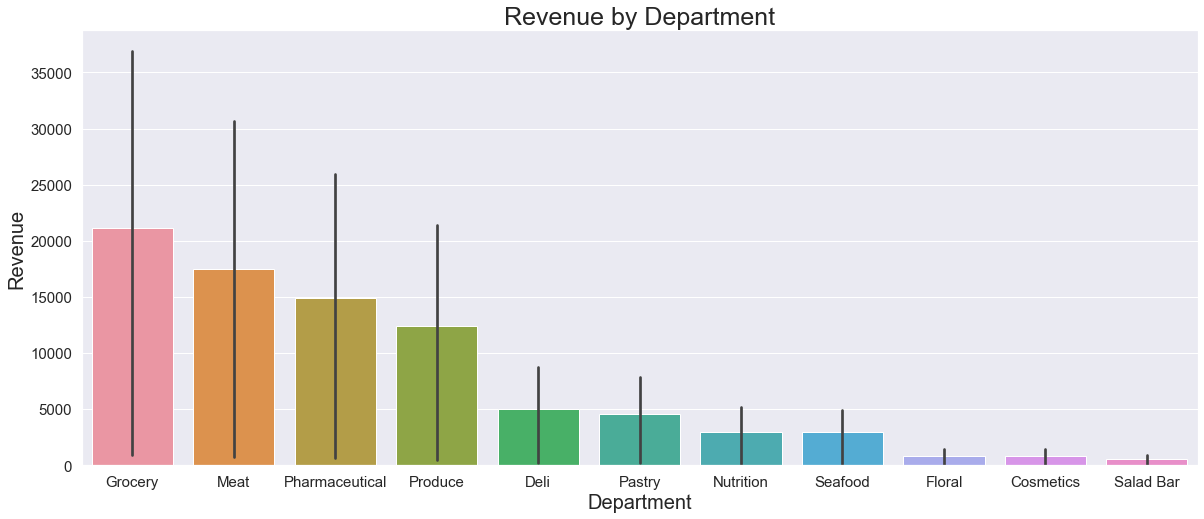

<Figure size 1440x576 with 0 Axes>

In [22]:
sns.barplot(x=depts.department, y = depts.sum_price, data=depts)
sns.set(rc={"figure.figsize":(20, 8)})
plt.title("Revenue by Department", fontsize = 25)
plt.xlabel('Department', fontsize = 20)
plt.ylabel('Revenue', fontsize = 20)
plt.tick_params(labelsize = 15)
plt.figure(figsize=(20,8))

<AxesSubplot:title={'center':'Revenue by Department'}, xlabel='department', ylabel='sum_price'>

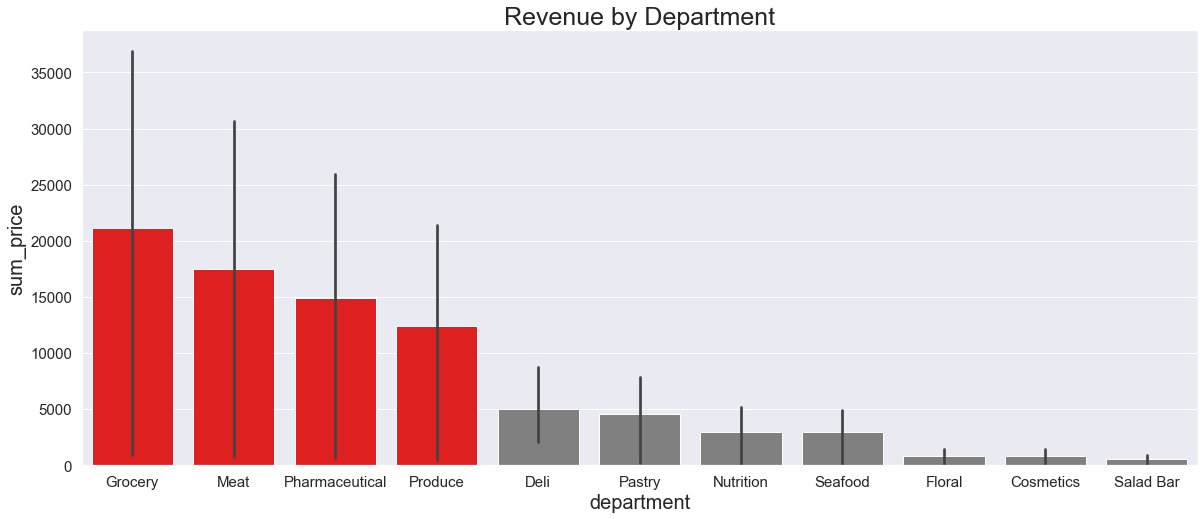

In [24]:

sns.set(rc={"figure.figsize":(20, 8)})
plt.title("Revenue by Department", fontsize = 25)

plt.tick_params(labelsize = 15)
values = depts.sum_price
clrs = ['grey' if (x < 20000) else 'red' for x in values ]
plt.xlabel('Department', fontsize = 20)
plt.ylabel('Revenue', fontsize = 20)

sns.barplot(x=depts.department, y = depts.sum_price, data=depts, palette=clrs)

In [25]:
df_dpt = df.groupby('department').agg(sum_price=('price', 'sum')).sort_values(by='sum_price', ascending = False)

In [26]:
df_dpt

,sum_price
department,
Grocery,63537.08
Meat,52443.39
Pharmaceutical,44686.05
Produce,37251.24
Deli,15097.86
Pastry,13759.60
Seafood,8922.92
Nutrition,8810.72
Floral,2588.94


In [27]:
df_dpt.columns

Index(['sum_price'], dtype='object')

In [28]:
df_dpt['percentage'] = df_dpt['sum_price']/df_dpt['sum_price'].sum()
print(df_dpt)


                sum_price  percentage
department                           
Grocery          63537.08    0.252919
Meat             52443.39    0.208759
Pharmaceutical   44686.05    0.177880
Produce          37251.24    0.148284
Deli             15097.86    0.060099
Pastry           13759.60    0.054772
Seafood           8922.92    0.035519
Nutrition         8810.72    0.035072
Floral            2588.94    0.010306
Cosmetics         2536.64    0.010097
Salad Bar         1580.44    0.006291


In [29]:
df_dpt.head()

,sum_price,percentage
department,,
Grocery,63537.08,0.252919
Meat,52443.39,0.208759
Pharmaceutical,44686.05,0.177880
Produce,37251.24,0.148284
Deli,15097.86,0.060099


In [30]:
total = df_dpt.iloc[0:4].sum()
print(total)

sum_price     197917.760000
percentage         0.787843
dtype: float64


In [31]:
next_4 = df_dpt.iloc[4:8].sum()
print(next_4)

sum_price     46591.100000
percentage        0.185463
dtype: float64


In [32]:
df_dpt['+5'] = df_dpt['sum_price'] * 1.05
df_dpt['increase'] = df_dpt['+5'] - df_dpt['sum_price']
df_dpt.head()

,sum_price,percentage,+5,increase
department,,,,
Grocery,63537.08,0.252919,66713.9340,3176.8540
Meat,52443.39,0.208759,55065.5595,2622.1695
Pharmaceutical,44686.05,0.177880,46920.3525,2234.3025
Produce,37251.24,0.148284,39113.8020,1862.5620
Deli,15097.86,0.060099,15852.7530,754.8930


In [33]:
print(total)
print(next_4)


sum_price     197917.760000
percentage         0.787843
dtype: float64
sum_price     46591.100000
percentage        0.185463
dtype: float64


<AxesSubplot:xlabel='loyalty'>

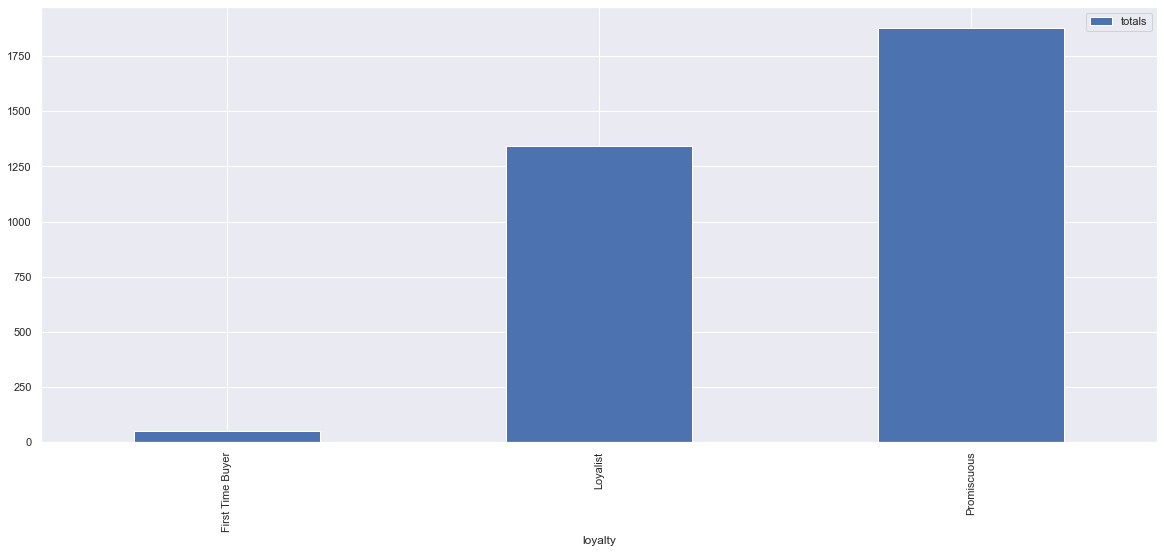

In [35]:
df.groupby('loyalty').agg(totals=('customer_id',pd.Series.nunique)).plot(kind='bar')

In [36]:
dfl = df.groupby('loyalty').agg(basket_totals=('basket_id',pd.Series.nunique))
dfl

,basket_totals
loyalty,
First Time Buyer,52
Loyalist,1413
Promiscuous,2033


<AxesSubplot:title={'center':'Customer Loyalty'}, ylabel='loyalty'>

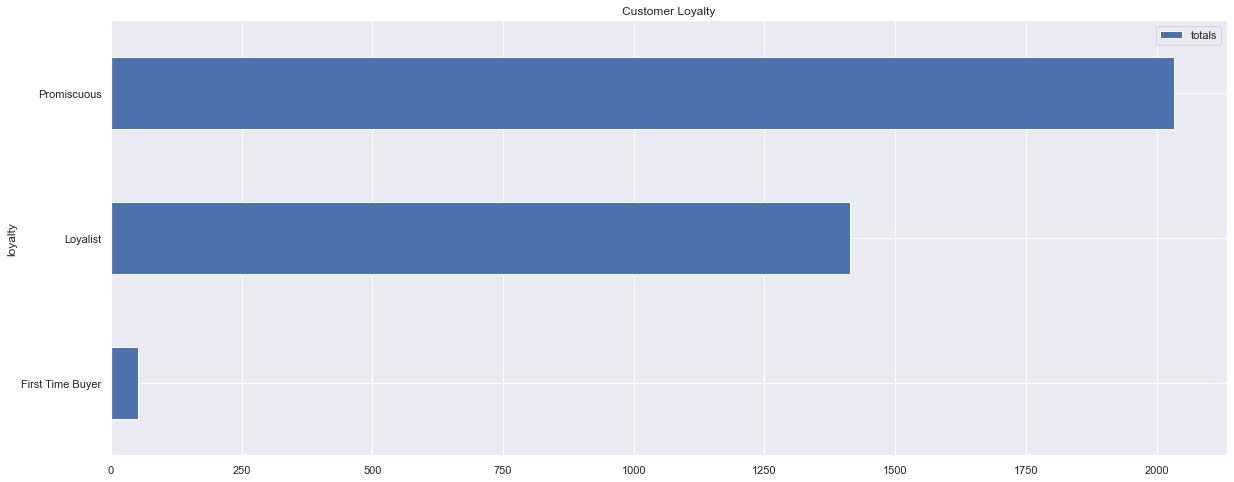

In [37]:
df.groupby('loyalty').agg(totals=('basket_id',pd.Series.nunique)).plot(kind='barh', title='Customer Loyalty')

In [38]:
df2 = df.groupby('loyalty').agg(sum_price=('price', 'sum'))
df2

,sum_price
loyalty,
First Time Buyer,3524.53
Loyalist,102324.80
Promiscuous,145365.55


In [39]:
df2.columns

Index(['sum_price'], dtype='object')

In [40]:
dfl['revenue'] = df2.sum_price
dfl

,basket_totals,revenue
loyalty,,
First Time Buyer,52,3524.53
Loyalist,1413,102324.80
Promiscuous,2033,145365.55


In [41]:
dfl['avg_basket'] = dfl.revenue / dfl.basket_totals
dfl

,basket_totals,revenue,avg_basket
loyalty,,,
First Time Buyer,52,3524.53,67.779423
Loyalist,1413,102324.80,72.416702
Promiscuous,2033,145365.55,71.502976


In [101]:
dfl['items'] = df.groupby('loyalty').agg(product_totals=('product_id', pd.Series.nunique))
dfl.head()

,basket_totals,revenue,avg_basket,items
loyalty,,,,
First Time Buyer,52,3524.53,67.779423,888
Loyalist,1413,102324.80,72.416702,7436
Promiscuous,2033,145365.55,71.502976,8415


In [103]:
dfl['avg_items'] = dfl['items'] / dfl['basket_totals']
dfl

,basket_totals,revenue,avg_basket,items,avg_items
loyalty,,,,,
First Time Buyer,52,3524.53,67.779423,888,17.076923
Loyalist,1413,102324.80,72.416702,7436,5.262562
Promiscuous,2033,145365.55,71.502976,8415,4.139203


In [52]:
cust.loyalty.value_counts()

Loyalist            41
Promiscuous         41
First Time Buyer    25
Name: loyalty, dtype: int64

In [53]:
df.transaction_date = pd.to_datetime(df.transaction_date) #Have to change to datetime format
df["year"] = df.transaction_date.dt.year
tmp = df.groupby(['year']).agg(sum_price=('price', 'sum')).reset_index()
tmp.head()

,year,sum_price
0,2017,72731.76
1,2018,74212.31
2,2019,74335.87
3,2020,29934.94


In [54]:
tmp = tmp.set_index('year')
tmp.head()

,sum_price
year,
2017,72731.76
2018,74212.31
2019,74335.87
2020,29934.94


In [55]:
df.transaction_date.max()

Timestamp('2020-05-19 00:00:00')

In [56]:
df.groupby(['commodity','loyalty']).agg(total_revenue=('price', sum))\
.sort_values('loyalty', ascending = True).reset_index().head(30)

,commodity,loyalty,total_revenue
0,Hardware supplies,First Time Buyer,5.72
1,Pickles/relish,First Time Buyer,4.08
2,Pet care supplies,First Time Buyer,2.99
3,Personal care appliances,First Time Buyer,15.99
4,Peppers,First Time Buyer,27.48
5,Pears,First Time Buyer,10.44
6,Crackers/misc bkd fd,First Time Buyer,16.34
7,Peanut butter/jelly/jams,First Time Buyer,12.54
8,Deli meats,First Time Buyer,69.30
9,Pasta sauce,First Time Buyer,7.34


In [61]:
df.groupby('age_band').agg(totals=('customer_id',pd.Series.nunique))

,totals
age_band,
19-24,1633
25-34,557
35-44,210
45-54,852
55-64,8
Greater than 65,8


<AxesSubplot:xlabel='age_band'>

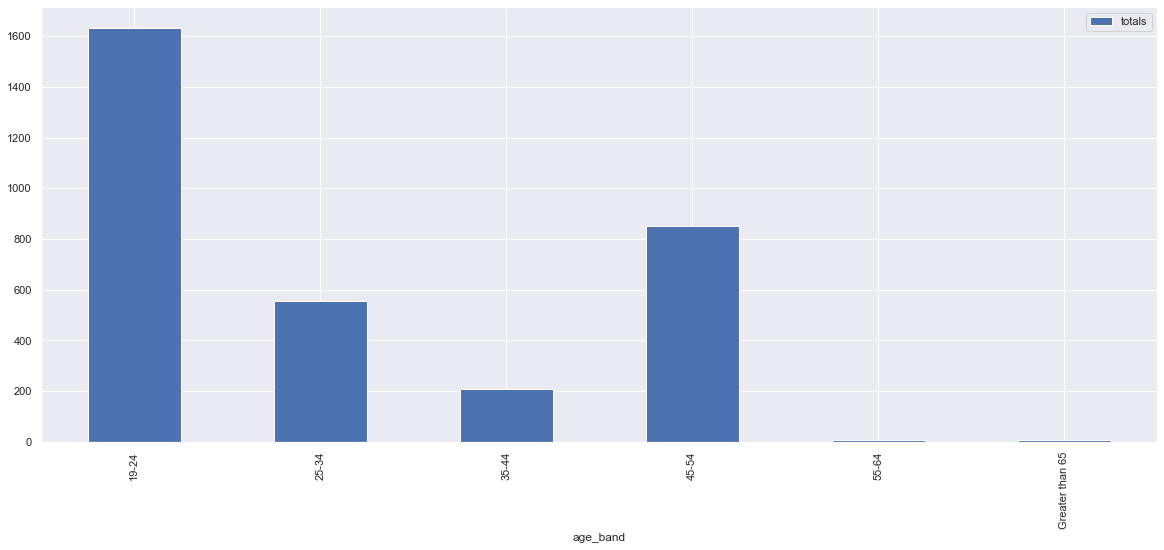

In [62]:
df.groupby('age_band').agg(totals=('customer_id',pd.Series.nunique)).plot(kind='bar')

In [63]:
tmp_stats = df.groupby(['household_type', 'basket_id']).agg(total_revenue=('price', sum)).reset_index()
tmp_stats.groupby('household_type').agg(
    avg_basket_amount=('total_revenue', 'mean'),
    mdn_basket_amount=('total_revenue', 'median'),
    total_basket_amount=('total_revenue', 'sum'),
    num_baskets=('basket_id', 'count')
)

,avg_basket_amount,mdn_basket_amount,total_basket_amount,num_baskets
household_type,,,,
1 adult with kids,72.093910,69.415,60847.26,844
2 adults with kids,69.995776,68.335,73075.59,1044
2 adults with no kids,72.395757,70.625,55455.15,766
Single female,73.429246,72.160,22395.92,305
Single male,73.174323,70.860,39440.96,539


In [64]:
tmp_stats = df.groupby(['age_band', 'basket_id']).agg(total_revenue=('price', sum)).reset_index()
tmp_stats.groupby('age_band').agg(
    avg_basket_amount=('total_revenue', 'mean'),
    mdn_basket_amount=('total_revenue', 'median'),
    total_basket_amount=('total_revenue', 'sum'),
    num_baskets=('basket_id', 'count')
)

,avg_basket_amount,mdn_basket_amount,total_basket_amount,num_baskets
age_band,,,,
19-24,73.587761,71.420,129514.46,1760
25-34,69.771551,68.730,41374.53,593
35-44,70.540000,65.910,15307.18,217
45-54,70.331502,68.605,64142.33,912
55-64,56.330000,56.420,450.64,8
Greater than 65,53.217500,48.890,425.74,8


In [65]:
tmp_stats = df.groupby(['loyalty', 'basket_id', 'customer_id']).agg(total_revenue=('price', sum)).reset_index()
tmp_stats.groupby('loyalty').agg(
    avg_basket_amount=('total_revenue', 'mean'),
    mdn_basket_amount=('total_revenue', 'median'),
    min_basket_amount=('total_revenue', 'min'),
    max_basket_amount=('total_revenue', 'max'),
    total_basket_amount=('total_revenue', 'sum'),
    num_baskets=('basket_id', 'count'),
    num_baskets_unq=('basket_id', pd.Series.nunique),
    num_customers=('customer_id', pd.Series.nunique)
)

,avg_basket_amount,mdn_basket_amount,min_basket_amount,max_basket_amount,total_basket_amount,num_baskets,num_baskets_unq,num_customers
loyalty,,,,,,,,
First Time Buyer,67.779423,71.57,9.99,108.17,3524.53,52,52,48
Loyalist,72.416702,70.06,1.00,201.65,102324.80,1413,1413,1341
Promiscuous,71.502976,69.83,1.00,186.26,145365.55,2033,2033,1879


In [70]:
top_5d = df.groupby(['department']).agg(total_revenue=('price',sum)) \
    .sort_values('total_revenue', ascending = False).reset_index().head(5)
top_5d


,department,total_revenue
0,Grocery,63537.08
1,Meat,52443.39
2,Pharmaceutical,44686.05
3,Produce,37251.24
4,Deli,15097.86


In [73]:
top_4d = df.groupby(['department']).agg(total_revenue=('price',sum)) \
    .sort_values('total_revenue', ascending = False).reset_index().head(4)

In [74]:
tmp = df[df.department.isin(top_4d.department.unique())].groupby(['department', 'commodity']).agg(total_revenue=('price', sum)).reset_index()
top_5c = pd.concat(
    [tmp[tmp.department == hh] \
         .sort_values('total_revenue', ascending=False) \
     .head(5) for hh in top_4d.department.unique()]).reset_index(drop=True)
top_5c

,department,commodity,total_revenue
0,Grocery,Soft drinks,4194.49
1,Grocery,Fluid milk products,3350.23
2,Grocery,Cheese,3056.22
3,Grocery,Frozen meat,2879.74
4,Grocery,Baked bread/buns/rolls,2370.49
5,Meat,Beef,17317.96
6,Meat,Lunch meat,5579.82
7,Meat,Pork,5030.35
8,Meat,Chicken,4287.86
9,Meat,Meat - Other,3426.20


In [75]:
df[(df.department.isin(top_5d.department)) & (df.commodity.isin(top_5c.commodity))] \
    .groupby(['department', 'loyalty', 'age_band']) \
    .agg(customer_count=('customer_id', pd.Series.nunique)) \
    .head(50)

customer_count
department     loyalty          age_band                       
Deli           First Time Buyer 19-24                         7
                                25-34                         4
                                35-44                         2
               Loyalist         19-24                       219
                                25-34                       100
                                35-44                        56
                                45-54                        14
                                55-64                         1
                                Greater than 65               2
               Promiscuous      19-24                       237
                                25-34                        78
                                35-44                         1
                                45-54                       220
                                55-64                         2
                                Greater than 65               1
Grocery        First Time Buyer 19-24                        20
                                25-34                        10
                                35-44                         6
                                45-54                         3
               Loyalist         19-24                       693
                                25-34                       256
                                35-44                       164
                                45-54                        45
                                55-64                         1
                                Greater than 65               2
               Promiscuous      19-24                       703
                                25-34                       201
                                35-44                        10
                                45-54                       685
                                55-64                         4
                                Greater than 65               5
Meat           First Time Buyer 19-24                        23
                                25-34                        12
                                35-44                         6
                                45-54                         2
               Loyalist         19-24                       705
                                25-34                       268
                                35-44                       168
                                45-54                        44
                                55-64                         1
                                Greater than 65               2
               Promiscuous      19-24                       734
                                25-34                       197
                                35-44                        11
                                45-54                       724
                                55-64                         4
                                Greater than 65               5
Pharmaceutical First Time Buyer 19-24                        21
                                25-34                         9
                                35-44                         5

In [76]:
next_df = df.groupby(['department']).agg(total_revenue=('price',sum)) \
    .sort_values('total_revenue', ascending = False).reset_index().head(10)

In [77]:
next_4d = next_df[4:8]
next_4d

,department,total_revenue
4,Deli,15097.86
5,Pastry,13759.60
6,Seafood,8922.92
7,Nutrition,8810.72


In [78]:
df1 = df[df.commodity.isin(top_5c.commodity)] \
    .groupby(['department', 'commodity', 'loyalty']) \
    .agg(customer_count=('customer_id', pd.Series.nunique),
        total_revenue=('price', sum))

In [79]:
df1

customer_count  total_revenue
department commodity      loyalty                                        
Deli       Cheese         First Time Buyer               9          35.82
                          Loyalist                     284        1283.00
                          Promiscuous                  409        1997.00
           Salad          First Time Buyer               4          11.66
                          Loyalist                     137         534.94
...                                                    ...            ...
Produce    Tropical fruit Loyalist                     639        1098.15
                          Promiscuous                  893        1442.32
Salad Bar  Salad          First Time Buyer               3           6.35
                          Loyalist                     198         666.25
                          Promiscuous                  239         876.44

[75 rows x 2 columns]

In [80]:
df1['avg_revenue'] = df1['total_revenue'] / df1['customer_count']
df1

customer_count  total_revenue  \
department commodity      loyalty                                           
Deli       Cheese         First Time Buyer               9          35.82   
                          Loyalist                     284        1283.00   
                          Promiscuous                  409        1997.00   
           Salad          First Time Buyer               4          11.66   
                          Loyalist                     137         534.94   
...                                                    ...            ...   
Produce    Tropical fruit Loyalist                     639        1098.15   
                          Promiscuous                  893        1442.32   
Salad Bar  Salad          First Time Buyer               3           6.35   
                          Loyalist                     198         666.25   
                          Promiscuous                  239         876.44   

                                            avg_revenue  
department commodity      loyalty                        
Deli       Cheese         First Time Buyer     3.980000  
                          Loyalist             4.517606  
                          Promiscuous          4.882641  
           Salad          First Time Buyer     2.915000  
                          Loyalist             3.904672  
...                                                 ...  
Produce    Tropical fruit Loyalist             1.718545  
                          Promiscuous          1.615140  
Salad Bar  Salad          First Time Buyer     2.116667  
                          Loyalist             3.364899  
                          Promiscuous          3.667113  

[75 rows x 3 columns]

In [83]:
df[df.commodity.isin(top_5c.commodity)] \
    .groupby(['department', 'commodity', 'loyalty']) \
    .agg(customer_count=('customer_id', pd.Series.nunique))

customer_count
department commodity      loyalty                         
Deli       Cheese         First Time Buyer               9
                          Loyalist                     284
                          Promiscuous                  409
           Salad          First Time Buyer               4
                          Loyalist                     137
...                                                    ...
Produce    Tropical fruit Loyalist                     639
                          Promiscuous                  893
Salad Bar  Salad          First Time Buyer               3
                          Loyalist                     198
                          Promiscuous                  239

[75 rows x 1 columns]

In [84]:
df1.sort_values('total_revenue', ascending=False)

customer_count  \
department     commodity             loyalty                            
Meat           Beef                  Promiscuous                 1101   
                                     Loyalist                     749   
               Lunch meat            Promiscuous                  862   
               Pork                  Promiscuous                  349   
Pharmaceutical Cigarettes            Promiscuous                  292   
...                                                               ...   
               Oral hygiene products First Time Buyer               9   
               Hair care products    First Time Buyer               5   
Deli           Salad                 First Time Buyer               4   
Salad Bar      Salad                 First Time Buyer               3   
Grocery        Meat - Other          First Time Buyer               2   

                                                       total_revenue  \
department     commodity             loyalty                           
Meat           Beef                  Promiscuous            10201.31   
                                     Loyalist                6894.34   
               Lunch meat            Promiscuous             3177.63   
               Pork                  Promiscuous             2910.33   
Pharmaceutical Cigarettes            Promiscuous             2859.41   
...                                                              ...   
               Oral hygiene products First Time Buyer          26.50   
               Hair care products    First Time Buyer          19.41   
Deli           Salad                 First Time Buyer          11.66   
Salad Bar      Salad                 First Time Buyer           6.35   
Grocery        Meat - Other          First Time Buyer           4.00   

                                                       avg_revenue  
department     commodity             loyalty                        
Meat           Beef                  Promiscuous          9.265495  
                                     Loyalist             9.204726  
               Lunch meat            Promiscuous          3.686346  
               Pork                  Promiscuous          8.339054  
Pharmaceutical Cigarettes            Promiscuous          9.792500  
...                                                            ...  
               Oral hygiene products First Time Buyer     2.944444  
               Hair care products    First Time Buyer     3.882000  
Deli           Salad                 First Time Buyer     2.915000  
Salad Bar      Salad                 First Time Buyer     2.116667  
Grocery        Meat - Other          First Time Buyer     2.000000  

[75 rows x 3 columns]

In [85]:
tmp_baskets = df.groupby(['loyalty', 'basket_id', 'customer_id']).agg(total_revenue=('price', sum)).reset_index()

In [86]:
tmp_baskets

,loyalty,basket_id,customer_id,total_revenue
0,First Time Buyer,52034,21132,71.92
1,First Time Buyer,52037,20992,57.37
2,First Time Buyer,52064,19888,95.60
3,First Time Buyer,52138,20798,30.38
4,First Time Buyer,52210,15847,30.79
...,...,...,...,...
3493,Promiscuous,6790900,2587300,15.00
3494,Promiscuous,6797900,2521400,15.00
3495,Promiscuous,6800800,2717300,1.00
3496,Promiscuous,6804400,2240100,1.00


# USED IN PRESENTATION

Text(0, 0.5, 'Basket Value')

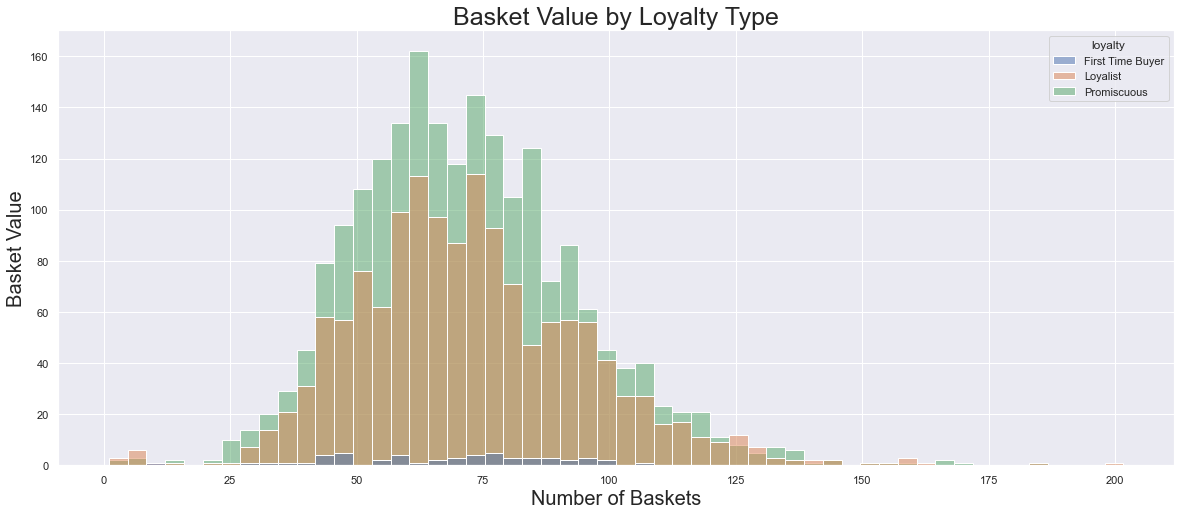

In [87]:
sns.histplot(x='total_revenue', hue='loyalty', data=tmp_baskets)
plt.title('Basket Value by Loyalty Type', fontsize=25)
plt.xlabel('Number of Baskets', fontsize=20)
plt.ylabel('Basket Value', fontsize=20)

# Loyalty Type Revenue Timeline

In [105]:
#df['transaction_date'] = df.transaction_date.str[:10] #avoid time in date
df['t_date'] = pd.to_datetime(df.transaction_date) #convert to date format
df['t_date'] = df.t_date + pd.offsets.MonthBegin(-1) #send dates to first day of the month

In [107]:
df_custmonths = df.groupby(['t_date', 'loyalty']).agg(total_revenue=('price', sum))
df_custmonths.head(10)

total_revenue
t_date     loyalty                        
2017-01-01 First Time Buyer          44.18
           Loyalist                1432.07
           Promiscuous             3811.68
2017-02-01 First Time Buyer           9.99
           Loyalist                2358.27
           Promiscuous             3369.94
2017-03-01 Loyalist                2204.54
           Promiscuous             4090.67
2017-04-01 First Time Buyer          94.92
           Loyalist                2710.42

In [108]:
df_custmonths = df_custmonths.unstack(level=-1)

In [109]:
df_custmonths.head()

total_revenue                     
loyalty    First Time Buyer Loyalist Promiscuous
t_date                                          
2017-01-01            44.18  1432.07     3811.68
2017-02-01             9.99  2358.27     3369.94
2017-03-01              NaN  2204.54     4090.67
2017-04-01            94.92  2710.42     2998.98
2017-05-01              NaN  2370.29     3090.86

<AxesSubplot:xlabel='t_date'>

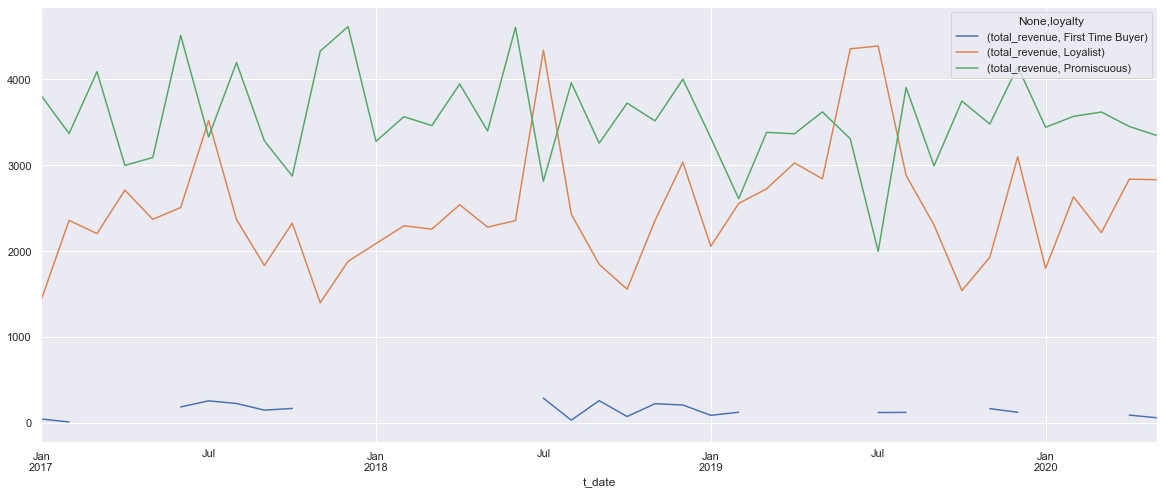

In [110]:
df_custmonths.plot()

I realised that I just spent time redoing a graph that we already had given in the course material - as below.

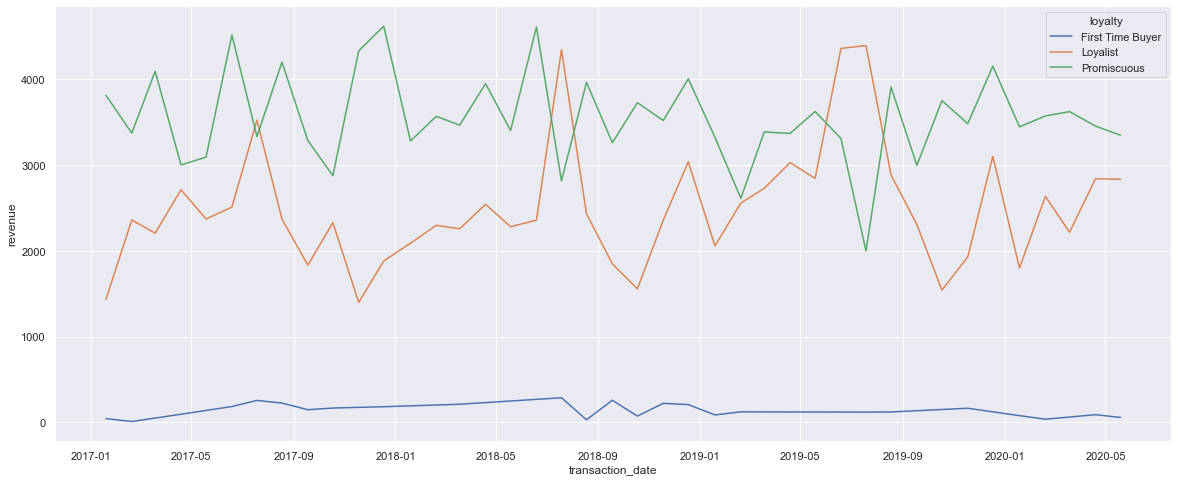

In [111]:
tmp = df.groupby(['loyalty', 'transaction_date']).agg(revenue=('price', sum)).reset_index()
sns.lineplot(data=tmp, x='transaction_date', y='revenue', hue='loyalty');

In [137]:
tmp_months = df.groupby(['t_date', 'loyalty', 'basket_id', 'customer_id']) \
                        .agg(total_revenue=('price', sum), average_revenue=('price', 'mean')).reset_index()

In [138]:
tmp_months

,t_date,loyalty,basket_id,customer_id,total_revenue,average_revenue
0,2017-01-01,First Time Buyer,65437,27872,44.18,2.598824
1,2017-01-01,Loyalist,65422,25189,61.92,2.580000
2,2017-01-01,Loyalist,65426,26624,62.96,2.331852
3,2017-01-01,Loyalist,65427,27533,76.79,3.656667
4,2017-01-01,Loyalist,65429,24466,69.97,2.915417
...,...,...,...,...,...,...
3493,2020-05-01,Promiscuous,75444,25428,32.90,1.935294
3494,2020-05-01,Promiscuous,75447,22281,59.39,2.969500
3495,2020-05-01,Promiscuous,75450,23167,62.21,2.827727
3496,2020-05-01,Promiscuous,75451,23152,114.87,4.254444


# USED IN PRESENTATION

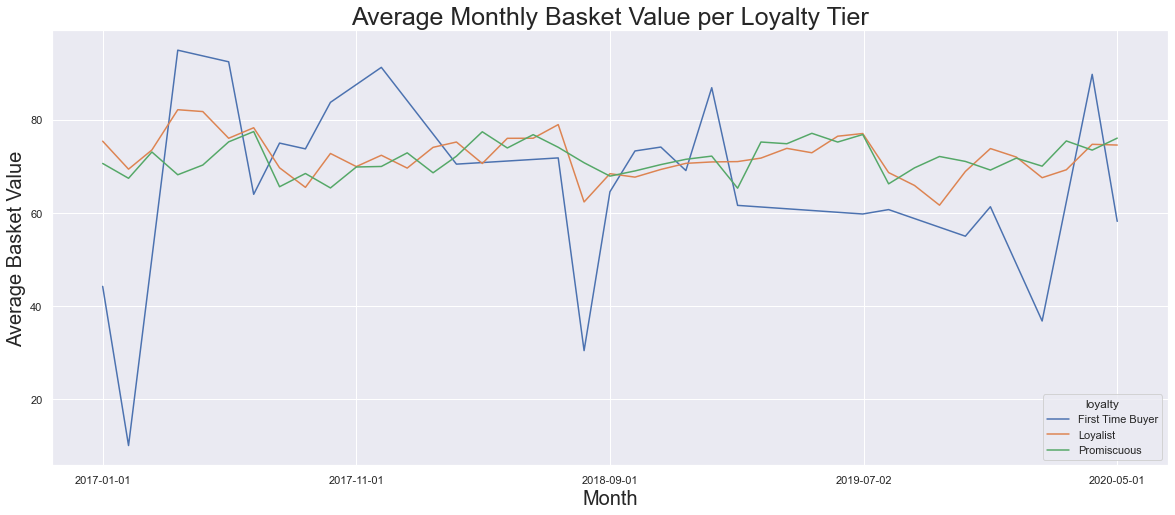

In [114]:
sns.lineplot(data=tmp_months, x='t_date', y='total_revenue', hue='loyalty', ci=None)
x_labels = pd.date_range(tmp_months.t_date.min(),tmp_months.t_date.max(),5)
plt.title('Average Monthly Basket Value per Loyalty Tier', fontsize=25)
plt.xlabel('Month', fontsize=20)
plt.ylabel('Average Basket Value', fontsize=20)
plt.xticks(x_labels);

In [140]:
hh = df.groupby(['household_type', 'basket_id', 'customer_id']) \
                .agg(total_revenue=('price', sum), avg_revenue=('price', 'mean')).reset_index()
hh

,household_type,basket_id,customer_id,total_revenue,avg_revenue
0,1 adult with kids,51965,19535,72.51,2.788846
1,1 adult with kids,51974,17548,47.38,2.787059
2,1 adult with kids,51976,19531,57.77,3.398235
3,1 adult with kids,51988,20270,72.01,3.429048
4,1 adult with kids,52001,18217,60.23,3.170000
...,...,...,...,...,...
3493,Single male,81142,30380,79.12,3.596364
3494,Single male,81150,34751,74.81,2.493667
3495,Single male,6797900,2521400,15.00,15.000000
3496,Single male,6808800,2280500,6.99,6.990000


In [116]:
hh_stats = df.groupby(['household_type', 'basket_id', 'customer_id']).agg(total_revenue=('price', sum)).reset_index()
hh_stats.groupby('household_type').agg(
    avg_basket_amount=('total_revenue', 'mean'),
    mdn_basket_amount=('total_revenue', 'median'),
    min_basket_amount=('total_revenue', 'min'),
    max_basket_amount=('total_revenue', 'max'),
    total_basket_amount=('total_revenue', 'sum'),
    num_baskets=('basket_id', 'count'),
    num_baskets_unq=('basket_id', pd.Series.nunique),
    num_customers=('customer_id', pd.Series.nunique)
)

,avg_basket_amount,mdn_basket_amount,min_basket_amount,max_basket_amount,total_basket_amount,num_baskets,num_baskets_unq,num_customers
household_type,,,,,,,,
1 adult with kids,72.093910,69.415,6.99,201.65,60847.26,844,844,807
2 adults with kids,69.995776,68.335,1.00,168.15,73075.59,1044,1044,976
2 adults with no kids,72.395757,70.625,1.00,186.26,55455.15,766,766,708
Single female,73.429246,72.160,6.99,137.74,22395.92,305,305,279
Single male,73.174323,70.860,6.99,157.19,39440.96,539,539,498


In [117]:
hh_stats.reset_index()

,index,household_type,basket_id,customer_id,total_revenue
0,0,1 adult with kids,51965,19535,72.51
1,1,1 adult with kids,51974,17548,47.38
2,2,1 adult with kids,51976,19531,57.77
3,3,1 adult with kids,51988,20270,72.01
4,4,1 adult with kids,52001,18217,60.23
...,...,...,...,...,...
3493,3493,Single male,81142,30380,79.12
3494,3494,Single male,81150,34751,74.81
3495,3495,Single male,6797900,2521400,15.00
3496,3496,Single male,6808800,2280500,6.99


Text(0, 0.5, 'Basket Value')

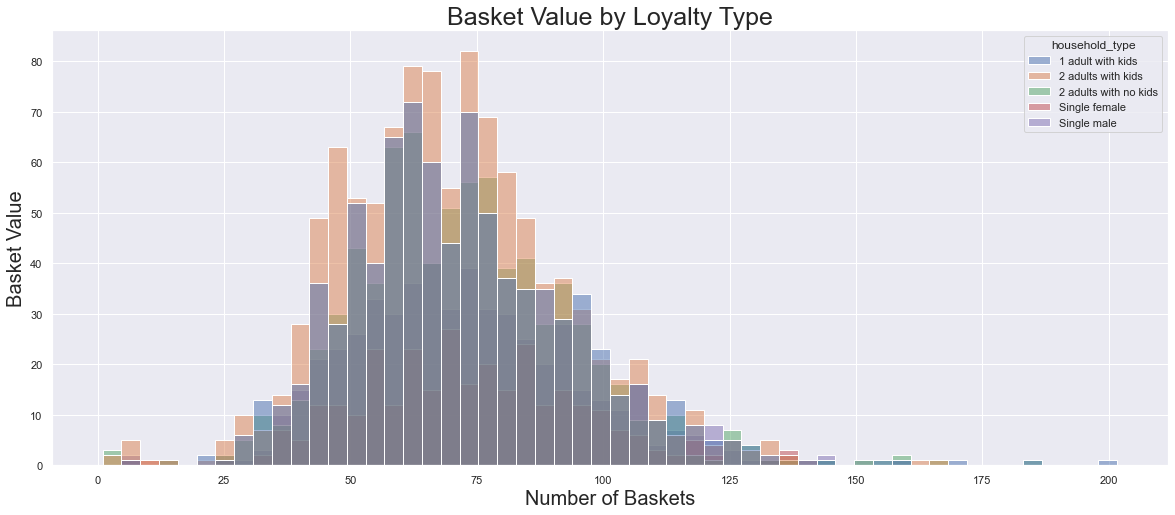

In [118]:
sns.histplot(x='total_revenue', hue='household_type', data=hh_stats, )
plt.title('Basket Value by Loyalty Type', fontsize=25)
plt.xlabel('Number of Baskets', fontsize=20)
plt.ylabel('Basket Value', fontsize=20)

In [141]:
tmp_hh = df.groupby(['t_date', 'household_type', 'basket_id', 'customer_id']) \
                    .agg(total_revenue=('price', sum), ).reset_index()
tmp_hh

,t_date,household_type,basket_id,customer_id,total_revenue
0,2017-01-01,1 adult with kids,65431,26534,36.18
1,2017-01-01,1 adult with kids,65434,22060,77.72
2,2017-01-01,1 adult with kids,65443,28822,73.00
3,2017-01-01,1 adult with kids,65446,22600,62.18
4,2017-01-01,1 adult with kids,65453,26037,71.81
...,...,...,...,...,...
3493,2020-05-01,Single male,75425,27494,108.34
3494,2020-05-01,Single male,75428,27577,67.46
3495,2020-05-01,Single male,75449,22374,85.17
3496,2020-05-01,Single male,75451,23152,114.87


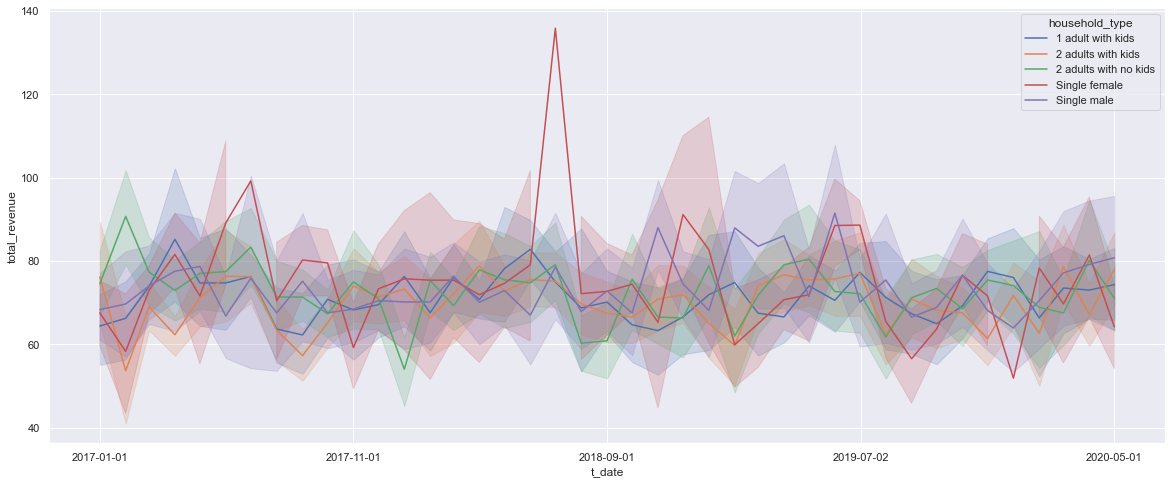

In [120]:
sns.lineplot(data=tmp_hh, x='t_date', y='total_revenue', hue='household_type')
x_labels = pd.date_range(tmp_hh.t_date.min(),tmp_hh.t_date.max(),5)
plt.xticks(x_labels);
#, ci=None

<AxesSubplot:>

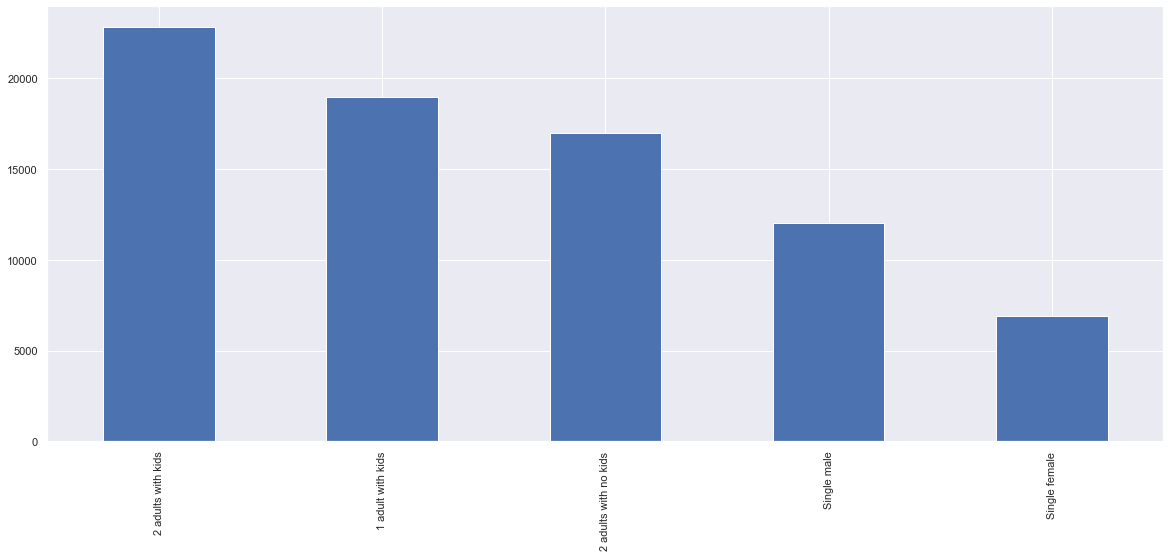

In [121]:
df.household_type.value_counts().plot(kind='bar')

In [122]:
df.age_band.value_counts(normalize= True)

19-24              0.510071
45-54              0.258225
25-34              0.165878
35-44              0.062161
Greater than 65    0.001891
55-64              0.001775
Name: age_band, dtype: float64

In [124]:
hh_age = df.groupby(['household_type', 'age_band']).agg(total_count=('household_type', 'count'), age_band_count=('age_band', 'count'), total_revenue=('price', 'sum'))
hh_age

total_count  age_band_count  \
household_type        age_band                                       
1 adult with kids     19-24                   8428            8428   
                      25-34                   4925            4925   
                      35-44                   4294            4294   
                      45-54                   1259            1259   
                      55-64                     31              31   
                      Greater than 65           54              54   
2 adults with kids    19-24                   3003            3003   
                      25-34                    636             636   
                      35-44                    165             165   
                      45-54                  18817           18817   
                      55-64                    106             106   
                      Greater than 65           93              93   
2 adults with no kids 19-24                  13361           13361   
                      25-34                   3463            3463   
                      35-44                    183             183   
Single female         19-24                   5461            5461   
                      25-34                   1394            1394   
                      35-44                     29              29   
                      45-54                      1               1   
                      55-64                      1               1   
Single male           19-24                   9405            9405   
                      25-34                   2479            2479   
                      35-44                    162             162   

                                       total_revenue  
household_type        age_band                        
1 adult with kids     19-24                 27398.55  
                      25-34                 15787.46  
                      35-44                 13462.67  
                      45-54                  3948.89  
                      55-64                    87.61  
                      Greater than 65         162.08  
2 adults with kids    19-24                  9831.86  
                      25-34                  1896.89  
                      35-44                   543.69  
                      45-54                 60186.45  
                      55-64                   353.04  
                      Greater than 65         263.66  
2 adults with no kids 19-24                 43719.87  
                      25-34                 11096.45  
                      35-44                   638.83  
Single female         19-24                 17823.18  
                      25-34                  4422.69  
                      35-44                   133.07  
                      45-54                     6.99  
                      55-64                     9.99  
Single male           19-24                 30741.00  
                      25-34                  8171.04  
                      35-44                   528.92

In [125]:
hh_age = hh_age.reset_index()

In [126]:
hh_age.head()

,household_type,age_band,total_count,age_band_count,total_revenue
0,1 adult with kids,19-24,8428,8428,27398.55
1,1 adult with kids,25-34,4925,4925,15787.46
2,1 adult with kids,35-44,4294,4294,13462.67
3,1 adult with kids,45-54,1259,1259,3948.89
4,1 adult with kids,55-64,31,31,87.61


# USED IN PRESENTATION

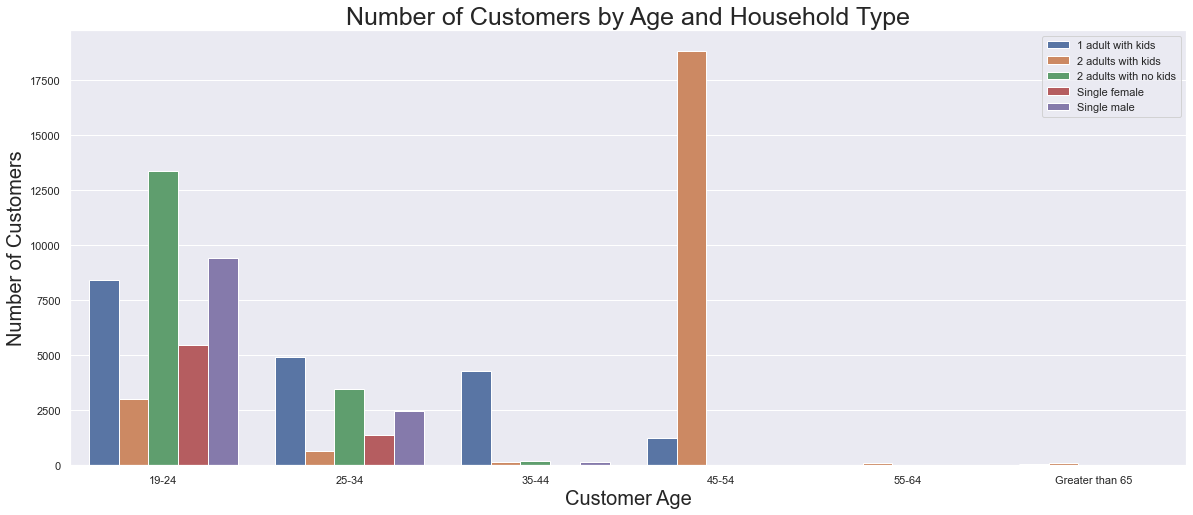

In [127]:
sns.barplot(data=hh_age, x='age_band', y='total_count', hue='household_type')
plt.title('Number of Customers by Age and Household Type', fontsize=25)
plt.xlabel('Customer Age', fontsize=20)
plt.ylabel('Number of Customers', fontsize=20)
plt.legend(loc='upper right')

<AxesSubplot:xlabel='total_count', ylabel='total_revenue'>

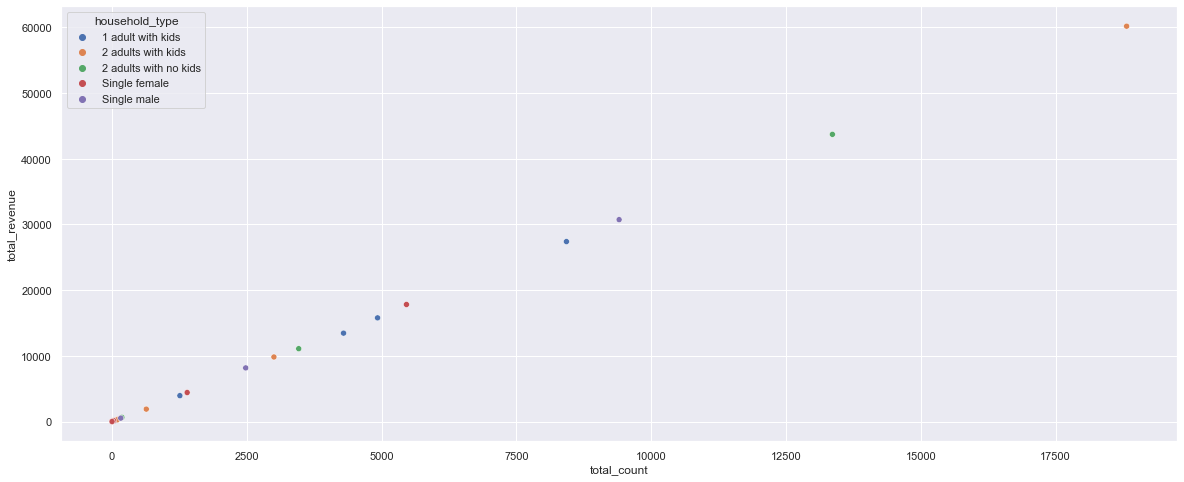

In [129]:
sns.scatterplot(x='total_count', y='total_revenue', hue='household_type', data=hh_age)

In [142]:
df.groupby(['commodity','loyalty', 'basket_id']) \
            .agg(average_revenue=('price', 'mean'), total_baskets=('commodity', 'count'))\
            .sort_values('average_revenue', ascending = False).reset_index().head(30)

,commodity,loyalty,basket_id,average_revenue,total_baskets
0,Infant formula,Loyalist,52101,68.97,1
1,Infant formula,Promiscuous,52102,68.97,1
2,Infant formula,Promiscuous,52149,68.97,1
3,Eye and ear care products,Loyalist,72775,56.97,1
4,Eye and ear care products,Promiscuous,72832,56.97,1
5,Eye and ear care products,Loyalist,72749,56.97,2
6,Eye and ear care products,Loyalist,72673,56.97,1
7,Eye and ear care products,Promiscuous,72778,56.97,1
8,Prepaid wireless accessories,Promiscuous,52230,50.00,1
9,Prepaid wireless accessories,Promiscuous,52212,50.00,1


In [149]:
df.customer_id.value_counts()

22255      68
22775      67
22341      62
29172      61
23046      61
           ..
2240100     1
2639600     1
2640800     1
2443300     1
2482800     1
Name: customer_id, Length: 3268, dtype: int64

In [151]:
df.loc[df['customer_id']=='22255']

,customer_id,product_id,basket_id,loyalty,household_type,age_band,department,brand,commodity,store,transaction_date,price,days_since_first,year,t_date


In [152]:
df.where(df == '22255')

,customer_id,product_id,basket_id,loyalty,household_type,age_band,department,brand,commodity,store,transaction_date,price,days_since_first,year,t_date
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT
77746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT
77747,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT
77748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT
